In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 20.9 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=9812b311a22ee9c1b2138e7d44e80e1f90864dd1ae712e2d14c1b549d4c16da9
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


18.868521485797526


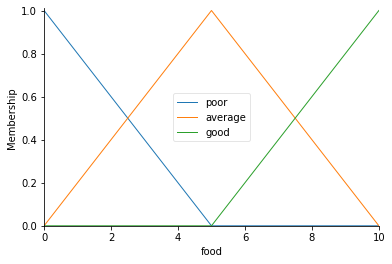

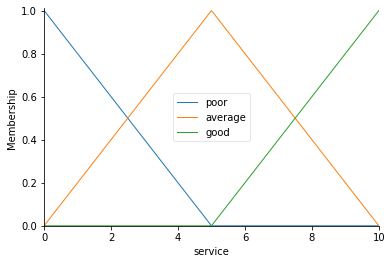

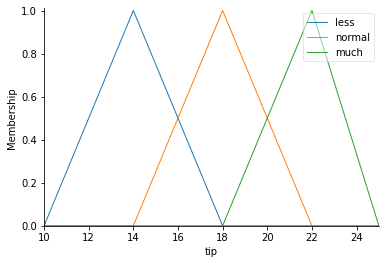

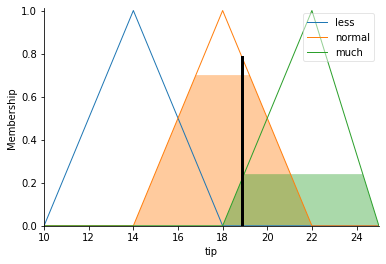

In [ ]:
from skfuzzy.control.controlsystem import ControlSystemSimulation
import numpy as np
import skfuzzy as  fuzz
from skfuzzy import control as ctrl
food= ctrl.Antecedent(np.arange(0,11,1),'food')
service=ctrl.Antecedent(np.arange(0,11,1),'service')
tip=ctrl.Consequent(np.arange(10,26,1),'tip')
food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])
service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])
tip['less']=fuzz.trimf(tip.universe,[10,14,18])
tip['normal']=fuzz.trimf(tip.universe,[14,18,22])
tip['much']=fuzz.trimf(tip.universe,[18,22,25])
food.view()
service.view()
tip.view()
#food['much'].view()
rule1=ctrl.Rule(food['poor'] & service['poor'],tip['less'])
rule2=ctrl.Rule(food['average'] & service['poor'],tip['normal'])
rule3=ctrl.Rule(food['good'] & service['poor'],tip['much'])
rule4=ctrl.Rule(food['poor'] & service['average'],tip['less'])
rule5=ctrl.Rule(food['average'] & service['average'],tip['normal'])
rule6=ctrl.Rule(food['good'] & service['average'],tip['much'])
rule7=ctrl.Rule(food['poor'] & service['good'],tip['less'])
rule8=ctrl.Rule(food['average'] & service['good'],tip['normal'])
rule9=ctrl.Rule(food['good'] & service['good'],tip['much'])
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=6.2
tipping.input['service']=3.5
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)



70.0


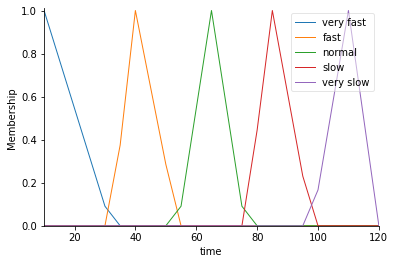

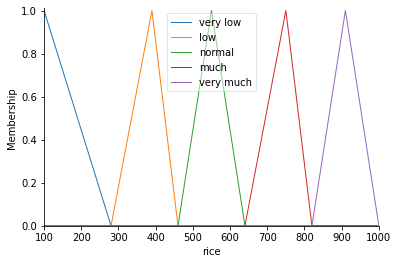

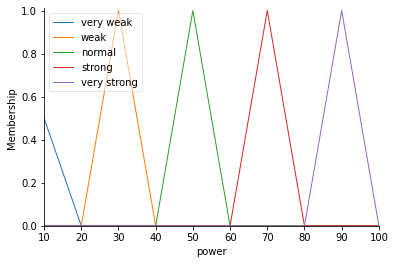

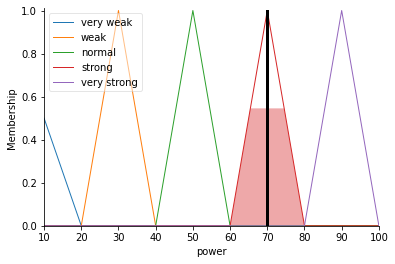

In [ ]:
from skfuzzy.control.controlsystem import ControlSystemSimulation
import numpy as np
import skfuzzy as  fuzz
from skfuzzy import control as ctrl

time= ctrl.Antecedent(np.arange(10,121,5),'time')
rice=ctrl.Antecedent(np.arange(100,1001,5),'rice')
power=ctrl.Consequent(np.arange(10,101,1),'power')

time['very fast']=fuzz.trimf(time.universe,[10,10,32])
time['fast']=fuzz.trimf(time.universe,[32,40,54])
time['normal']=fuzz.trimf(time.universe,[54,65,76])
time['slow']=fuzz.trimf(time.universe,[76,85,98])
time['very slow']=fuzz.trimf(time.universe,[98,110,120])

rice['very low']=fuzz.trimf(rice.universe,[100,100,280])
rice['low']=fuzz.trimf(rice.universe,[280,390,460])
rice['normal']=fuzz.trimf(rice.universe,[460,550,640])
rice['much']=fuzz.trimf(rice.universe,[640,750,820])
rice['very much']=fuzz.trimf(rice.universe,[820,910,1000])

power['very weak']=fuzz.trimf(power.universe,[0,0,20])
power['weak']=fuzz.trimf(power.universe,[20,30,40])
power['normal']=fuzz.trimf(power.universe,[40,50,60])
power['strong']=fuzz.trimf(power.universe,[60,70,80])
power['very strong']=fuzz.trimf(power.universe,[80,90,100])

time.view()
rice.view()
power.view()

rule1=ctrl.Rule(time['very fast'] & rice['very low'],power['very strong'])
rule2=ctrl.Rule(time['fast'] & rice['very low'],power['normal'])
rule3=ctrl.Rule(time['normal'] & rice['very low'],power['strong'])
rule4=ctrl.Rule(time['slow'] & rice['very low'],power['weak'])
rule5=ctrl.Rule(time['very slow'] & rice['very low'],power['very weak'])
rule6=ctrl.Rule(time['very fast'] & rice['low'],power['very strong'])
rule7=ctrl.Rule(time['fast'] & rice['low'],power['normal'])
rule8=ctrl.Rule(time['normal'] & rice['low'],power['strong'])
rule9=ctrl.Rule(time['slow'] & rice['low'],power['weak'])
rule10=ctrl.Rule(time['very slow'] & rice['low'],power['very weak'])
rule11=ctrl.Rule(time['very fast'] & rice['normal'],power['weak'])
rule12=ctrl.Rule(time['fast'] & rice['normal'],power['very weak'])
rule13=ctrl.Rule(time['normal'] & rice['normal'],power['normal'])
rule14=ctrl.Rule(time['slow'] & rice['normal'],power['strong'])
rule15=ctrl.Rule(time['very slow'] & rice['normal'],power['very strong'])
rule16=ctrl.Rule(time['very fast'] & rice['much'],power['normal'])
rule17=ctrl.Rule(time['fast'] & rice['much'],power['very strong'])
rule18=ctrl.Rule(time['normal'] & rice['much'],power['strong'])
rule19=ctrl.Rule(time['slow'] & rice['much'],power['weak'])
rule20=ctrl.Rule(time['very slow'] & rice['much'],power['very weak'])
rule21=ctrl.Rule(time['very fast'] & rice['very much'],power['very strong'])
rule22=ctrl.Rule(time['fast'] & rice['very much'],power['strong'])
rule23=ctrl.Rule(time['normal'] & rice['very much'],power['normal'])
rule24=ctrl.Rule(time['slow'] & rice['very much'],power['weak'])
rule25=ctrl.Rule(time['very slow'] & rice['very much'],power['very weak'])

powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16
                                    ,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering=ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['time']=70
powering.input['rice']=20
powering.compute()
print(powering.output['power'])
power.view(sim=powering)




